# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV,cross_val_score
import gradio as gr

# Load the dataset

In [2]:
df = pd.read_csv('synthetic_energy_usage_data_adjusted.csv')

# Understanding the Dataset Structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ambient_Temperature         1000 non-null   float64
 1   Humidity                    1000 non-null   float64
 2   Production_Volume           1000 non-null   float64
 3   Employee_Count              1000 non-null   float64
 4   Type_A_Machines_Running     1000 non-null   int64  
 5   Type_B_Machines_Running     1000 non-null   int64  
 6   Type_C_Machines_Running     1000 non-null   int64  
 7   Number_of_Machines_Running  1000 non-null   int64  
 8   Type_A_Machines_Overdue     1000 non-null   int64  
 9   Type_A_Machines_Regular     1000 non-null   int64  
 10  Type_B_Machines_Overdue     1000 non-null   int64  
 11  Type_B_Machines_Regular     1000 non-null   int64  
 12  Type_C_Machines_Overdue     1000 non-null   int64  
 13  Type_C_Machines_Regular     1000 n

# Previewing the Dataset

In [4]:
df.head()

,Ambient_Temperature,Humidity,Production_Volume,Employee_Count,Type_A_Machines_Running,Type_B_Machines_Running,Type_C_Machines_Running,Number_of_Machines_Running,Type_A_Machines_Overdue,Type_A_Machines_Regular,Type_B_Machines_Overdue,Type_B_Machines_Regular,Type_C_Machines_Overdue,Type_C_Machines_Regular,Shift,Day_of_Week,Season,Energy_Consumption
0,27.0,0.0,469.0,85.0,10,16,11,37,7,3,9,7,7,4,Morning,Weekday,Winter,899.0
1,24.0,0.0,425.0,74.0,7,17,16,40,6,1,8,9,4,12,Morning,Weekday,Fall,829.0
2,28.0,1.0,532.0,91.0,12,6,13,31,11,1,2,4,8,5,General,Weekday,Summer,1281.0
3,33.0,1.0,634.0,104.0,11,9,5,25,9,2,8,1,1,4,Morning,Weekend,Spring,1484.0
4,24.0,0.0,312.0,112.0,7,12,7,26,4,3,3,9,4,3,Night,Weekday,Fall,615.0


In [5]:
df['Day_of_Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [6]:
df['Shift'].unique()

array(['Morning', 'General', 'Night'], dtype=object)

# Statistical summaries of numerical columns

In [189]:
df.describe()

,Ambient_Temperature,Humidity,Production_Volume,Employee_Count,Type_A_Machines_Running,Type_B_Machines_Running,Type_C_Machines_Running,Number_of_Machines_Running,Type_A_Machines_Overdue,Type_A_Machines_Regular,Type_B_Machines_Overdue,Type_B_Machines_Regular,Type_C_Machines_Overdue,Type_C_Machines_Regular,Energy_Consumption
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.088000,0.515000,501.4530,99.766000,11.922000,11.895000,11.928000,35.745000,5.546000,6.376000,5.326000,6.569000,5.496000,6.432000,1238.230000
std,4.893486,0.500025,96.8951,20.764643,4.279279,4.303777,4.283359,7.278389,4.332742,4.236339,4.258857,4.288313,4.268748,4.241387,304.842274
min,9.000000,0.000000,198.0000,40.000000,5.000000,5.000000,5.000000,16.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,562.000000
25%,22.000000,0.000000,435.7500,85.000000,8.000000,8.000000,8.000000,31.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,975.000000
50%,25.000000,1.000000,501.0000,99.000000,12.000000,12.000000,12.000000,36.000000,5.000000,6.000000,4.500000,6.000000,5.000000,6.000000,1247.000000
75%,28.000000,1.000000,567.0000,114.000000,16.000000,16.000000,16.000000,41.000000,8.000000,9.000000,8.000000,9.000000,8.000000,9.000000,1487.250000
max,44.000000,1.000000,814.0000,179.000000,19.000000,19.000000,19.000000,56.000000,18.000000,19.000000,18.000000,19.000000,18.000000,19.000000,1905.000000


# Displaying column names of the dataset

In [190]:
df.columns

Index(['Ambient_Temperature', 'Humidity', 'Production_Volume',
       'Employee_Count', 'Type_A_Machines_Running', 'Type_B_Machines_Running',
       'Type_C_Machines_Running', 'Number_of_Machines_Running',
       'Type_A_Machines_Overdue', 'Type_A_Machines_Regular',
       'Type_B_Machines_Overdue', 'Type_B_Machines_Regular',
       'Type_C_Machines_Overdue', 'Type_C_Machines_Regular', 'Shift',
       'Day_of_Week', 'Season', 'Energy_Consumption'],
      dtype='object')

# Dataset Dimensions

In [191]:
df.shape

(1000, 18)

# Checking Null values

In [192]:
df.isnull().sum()

Ambient_Temperature           0
Humidity                      0
Production_Volume             0
Employee_Count                0
Type_A_Machines_Running       0
Type_B_Machines_Running       0
Type_C_Machines_Running       0
Number_of_Machines_Running    0
Type_A_Machines_Overdue       0
Type_A_Machines_Regular       0
Type_B_Machines_Overdue       0
Type_B_Machines_Regular       0
Type_C_Machines_Overdue       0
Type_C_Machines_Regular       0
Shift                         0
Day_of_Week                   0
Season                        0
Energy_Consumption            0
dtype: int64

# Checking for duplicates

In [193]:
df.duplicated().sum ()

0

# Checking Data types

In [194]:
df.dtypes

Ambient_Temperature           float64
Humidity                      float64
Production_Volume             float64
Employee_Count                float64
Type_A_Machines_Running         int64
Type_B_Machines_Running         int64
Type_C_Machines_Running         int64
Number_of_Machines_Running      int64
Type_A_Machines_Overdue         int64
Type_A_Machines_Regular         int64
Type_B_Machines_Overdue         int64
Type_B_Machines_Regular         int64
Type_C_Machines_Overdue         int64
Type_C_Machines_Regular         int64
Shift                          object
Day_of_Week                    object
Season                         object
Energy_Consumption            float64
dtype: object

# Visualizing Feature Distributions with Box Plots

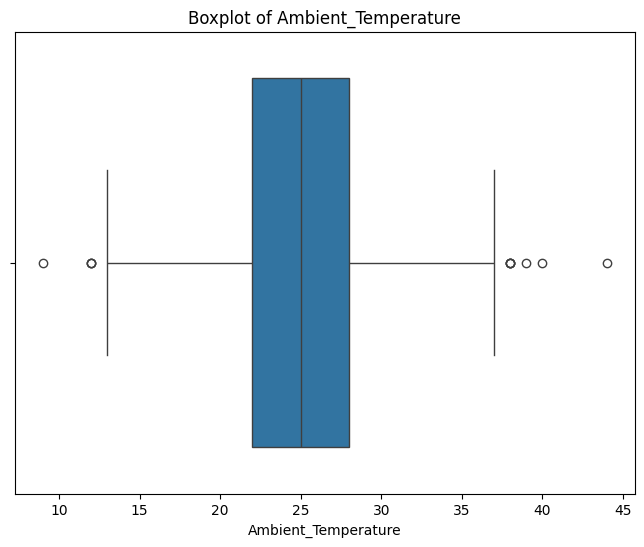

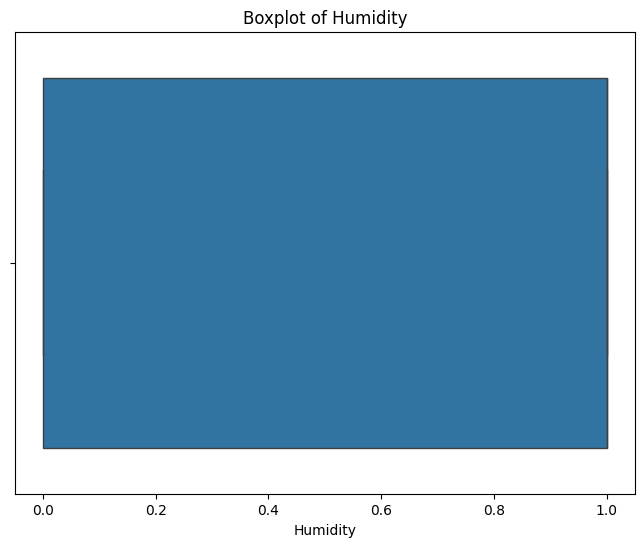

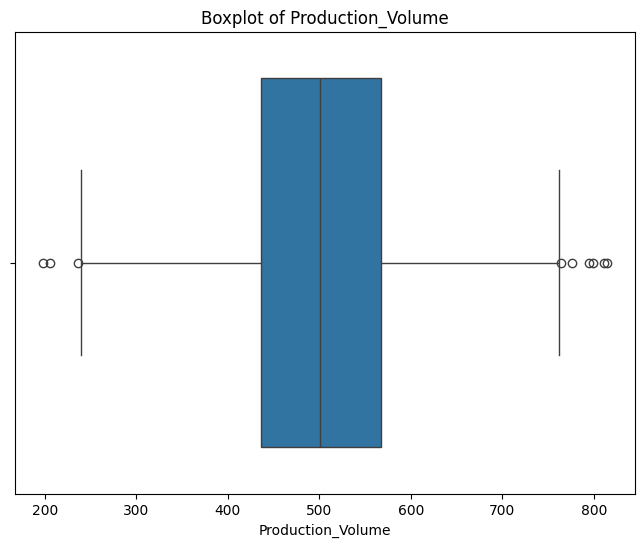

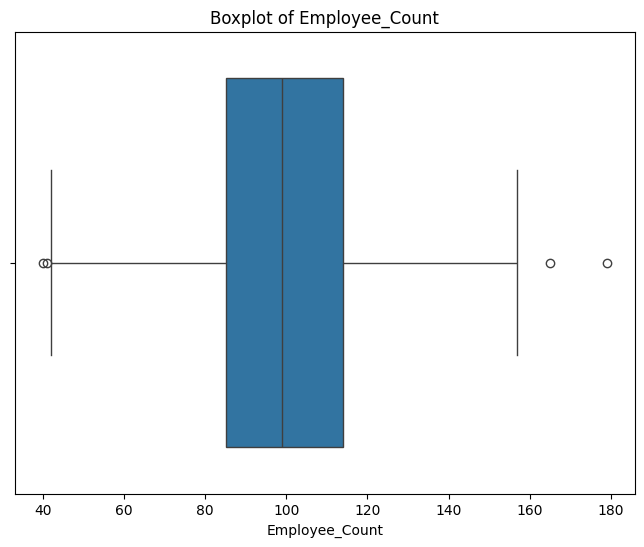

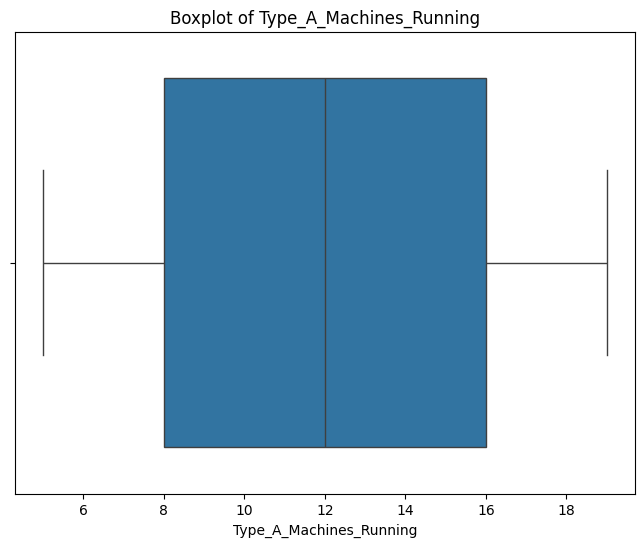

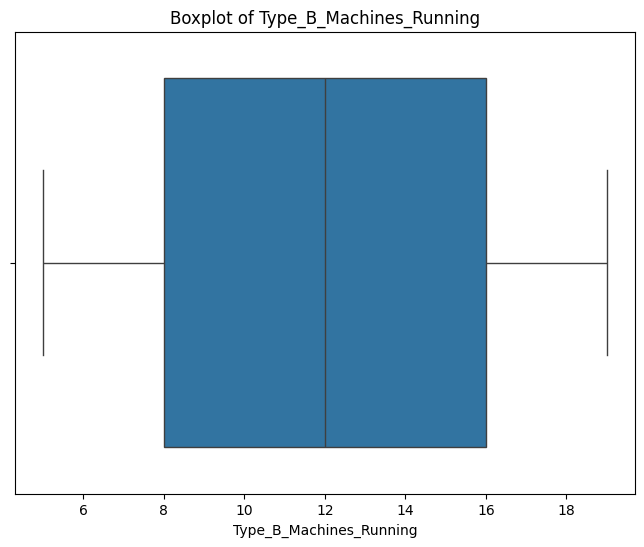

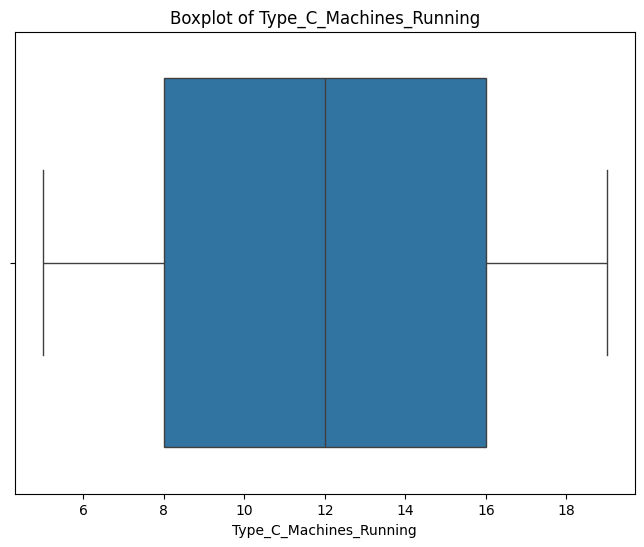

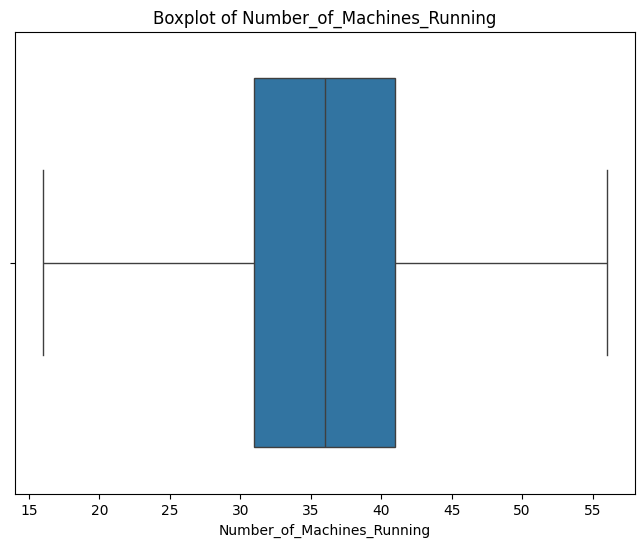

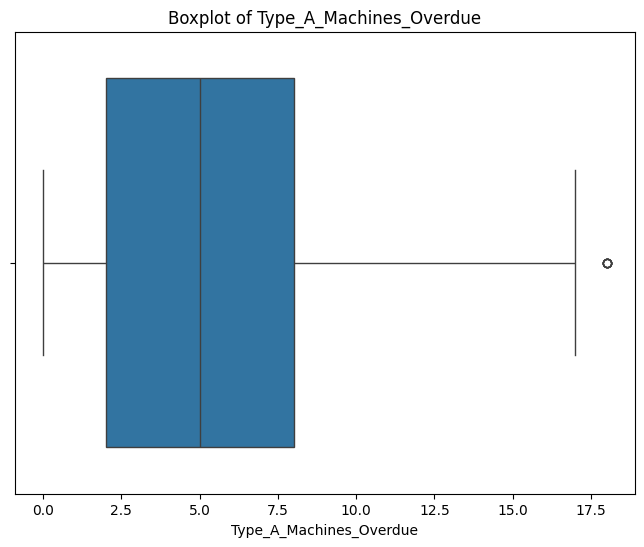

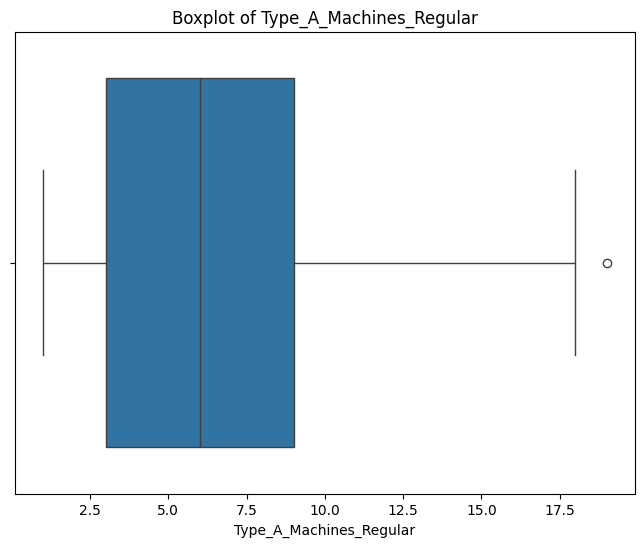

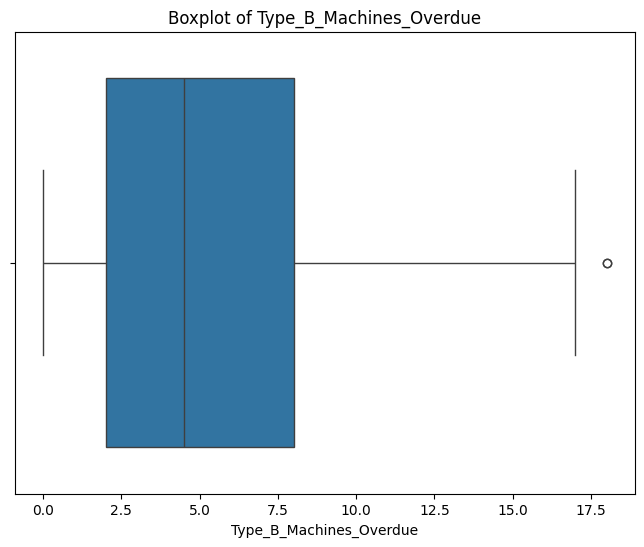

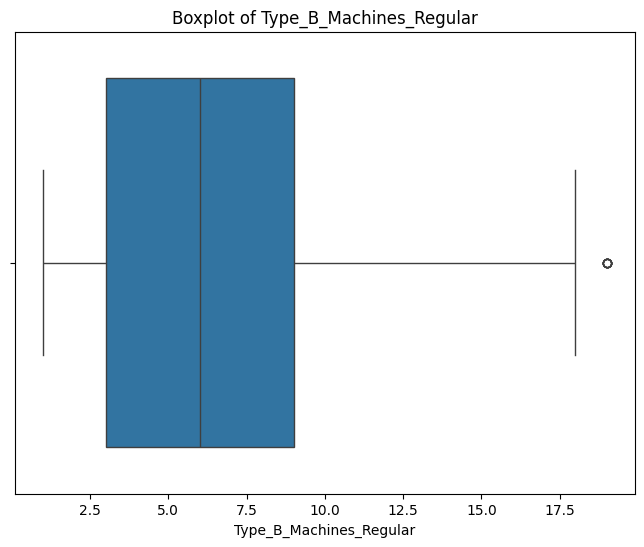

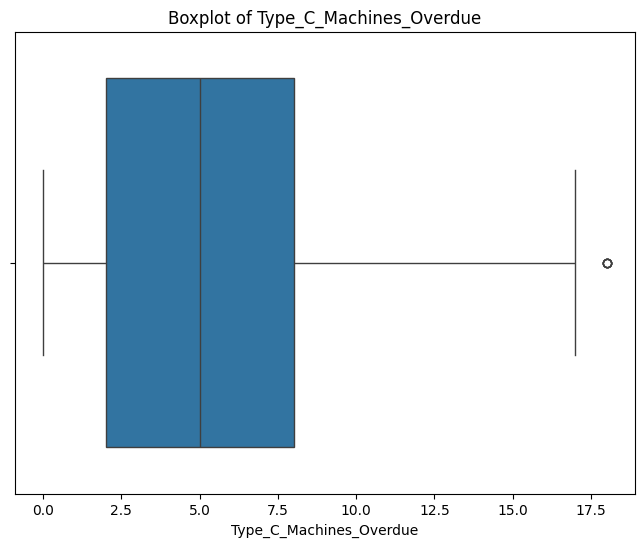

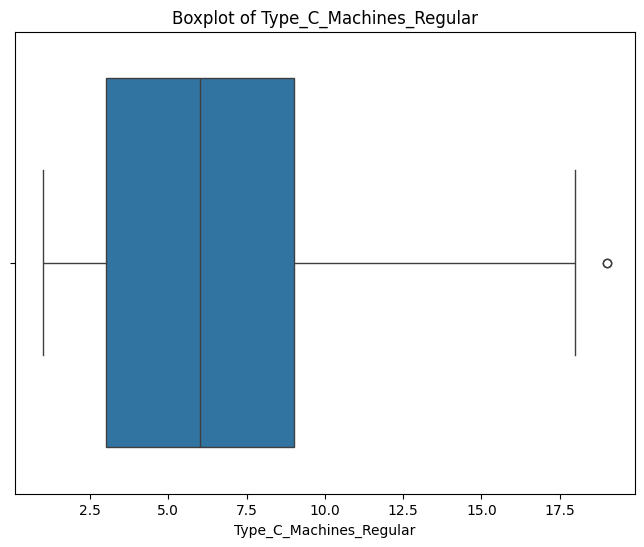

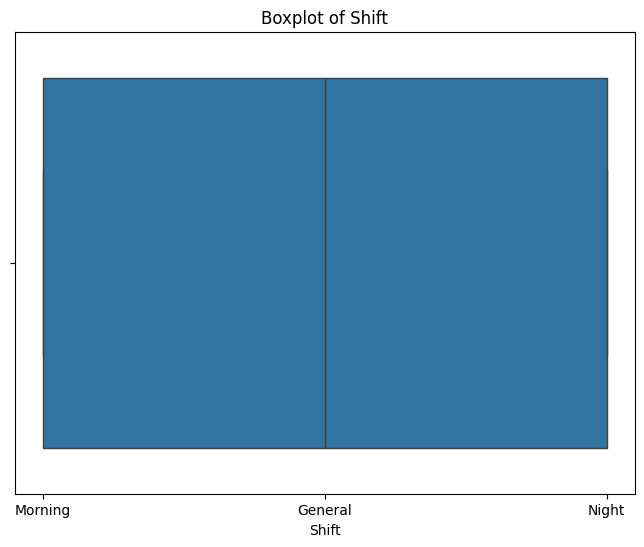

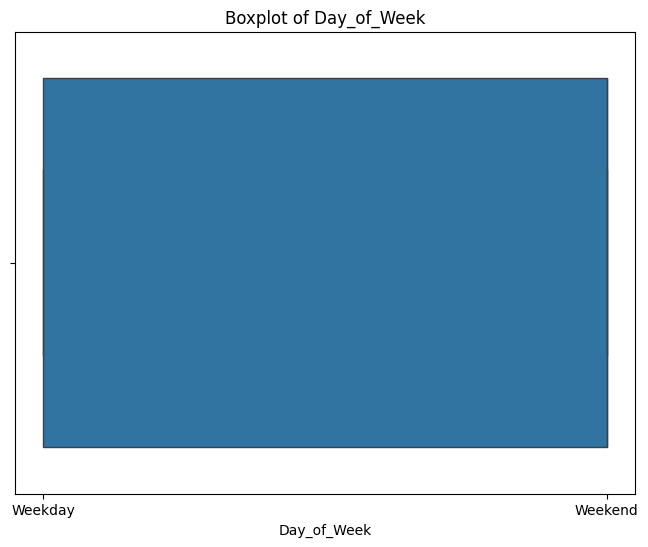

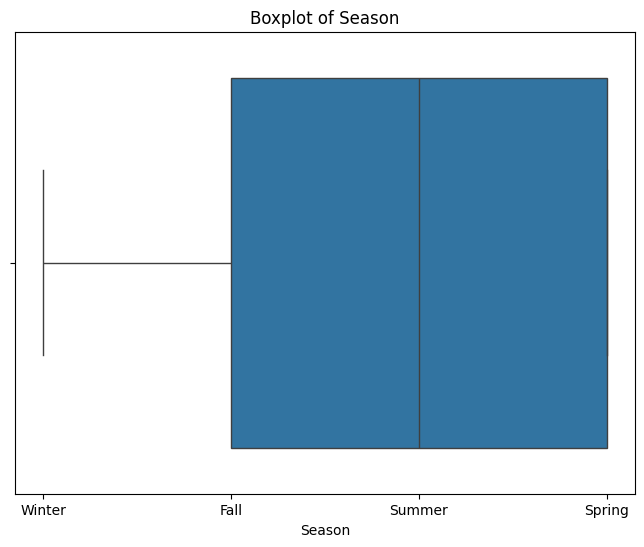

In [195]:
columns = ['Ambient_Temperature', 'Humidity', 'Production_Volume',
           'Employee_Count', 'Type_A_Machines_Running', 'Type_B_Machines_Running',
           'Type_C_Machines_Running', 'Number_of_Machines_Running',
           'Type_A_Machines_Overdue', 'Type_A_Machines_Regular',
           'Type_B_Machines_Overdue', 'Type_B_Machines_Regular',
           'Type_C_Machines_Overdue', 'Type_C_Machines_Regular', 'Shift',
           'Day_of_Week', 'Season']
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling the Outliers

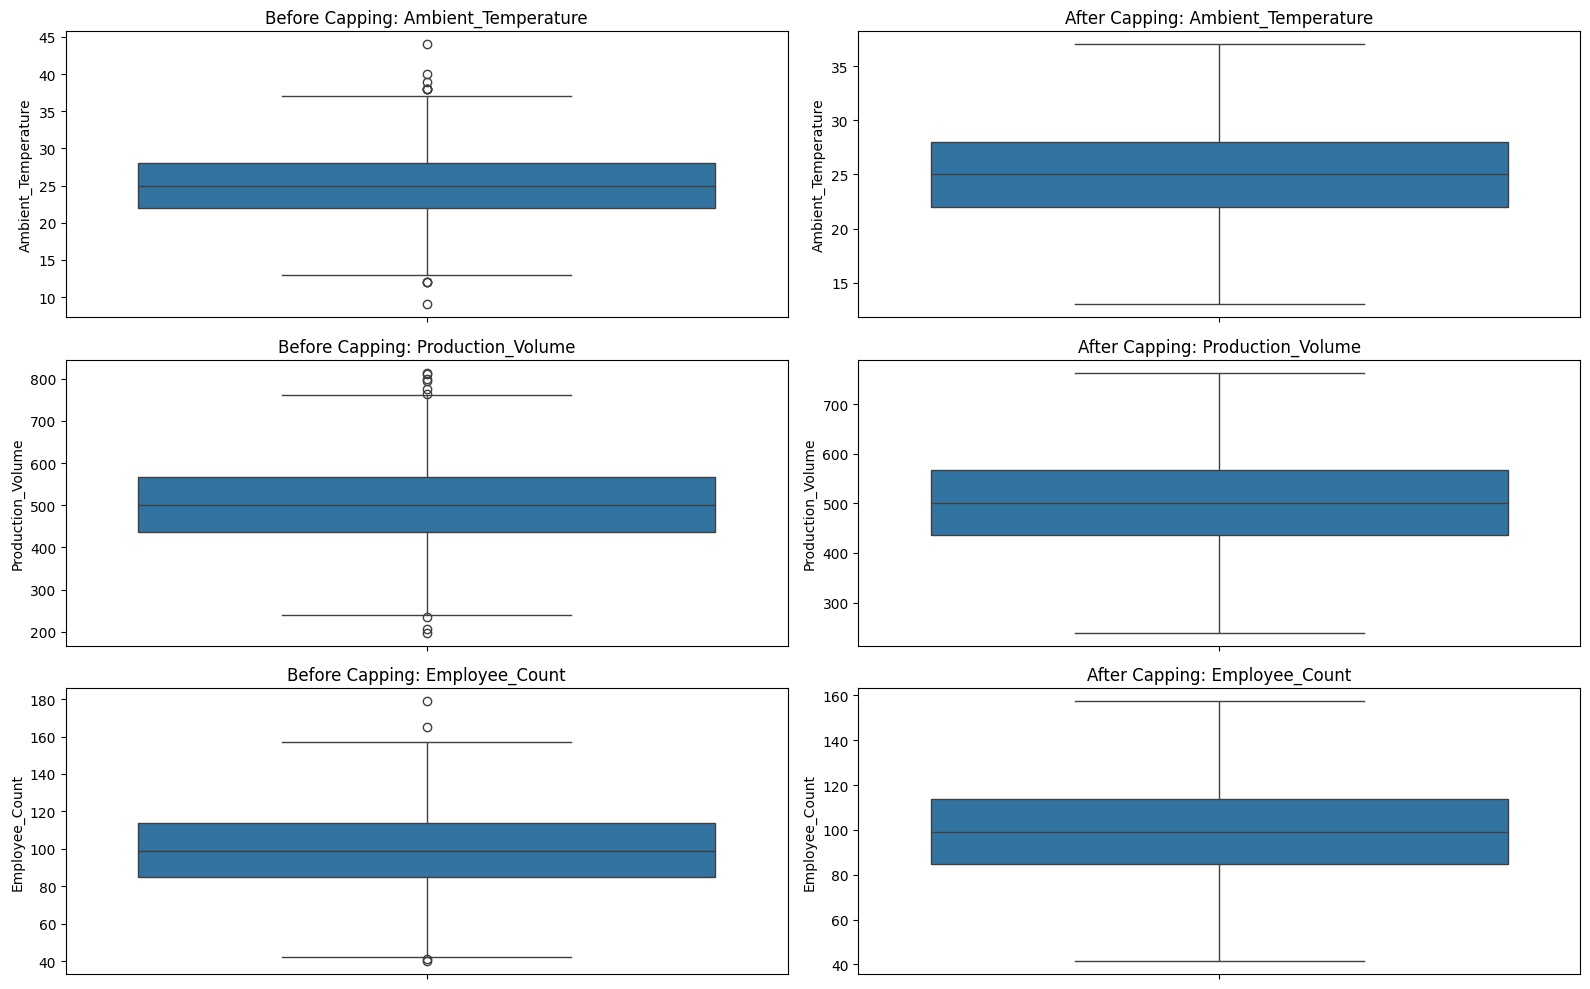

In [196]:
columns = ['Ambient_Temperature', 'Production_Volume', 'Employee_Count']
def capping_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Applying capping
    column = np.where(column > upper_limit, upper_limit, 
                      np.where(column < lower_limit, lower_limit, column))
    return column


new_df = df.copy() 
for i in columns:
    new_df[i] = capping_outliers(new_df[i])

#visualizing before and after capping the outliers
plt.figure(figsize=(16,10))

# Boxplots before handling outliers
for i, col in enumerate(columns):
    plt.subplot(3, 2, 2*i+1) 
    sns.boxplot(df[col])
    plt.title(f'Before Capping: {col}')

# Boxplots after handling outliers
for i, col in enumerate(columns):
    plt.subplot(3, 2, 2*i+2)  
    sns.boxplot(new_df[col])
    plt.title(f'After Capping: {col}')

plt.tight_layout() 
plt.show()


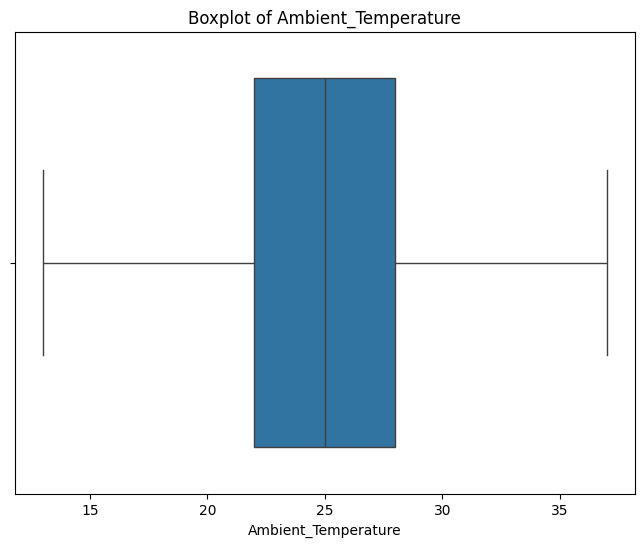

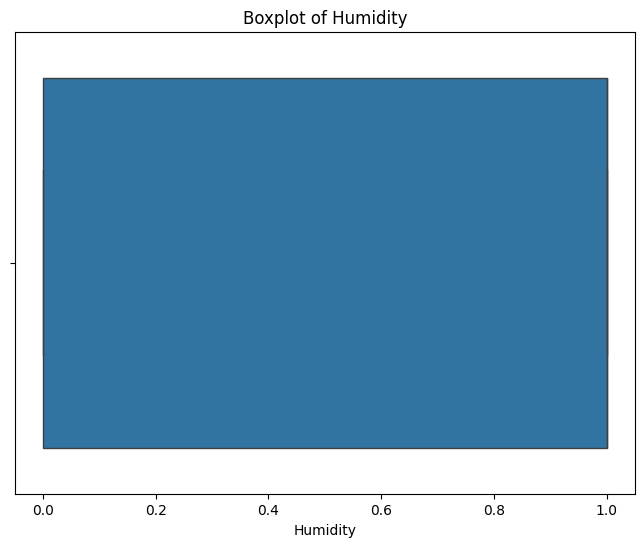

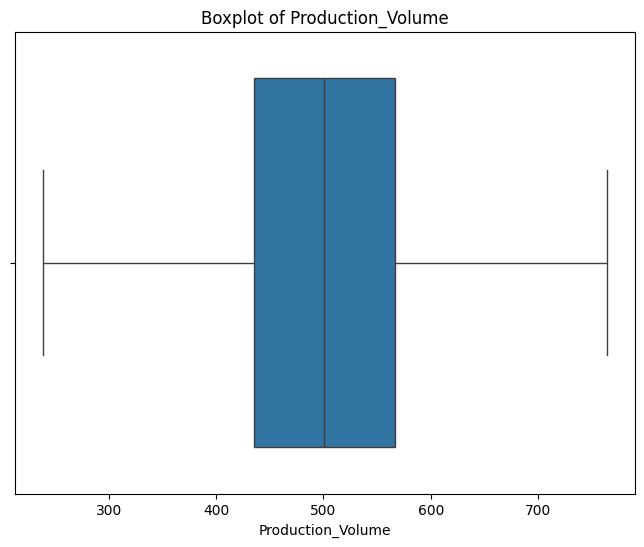

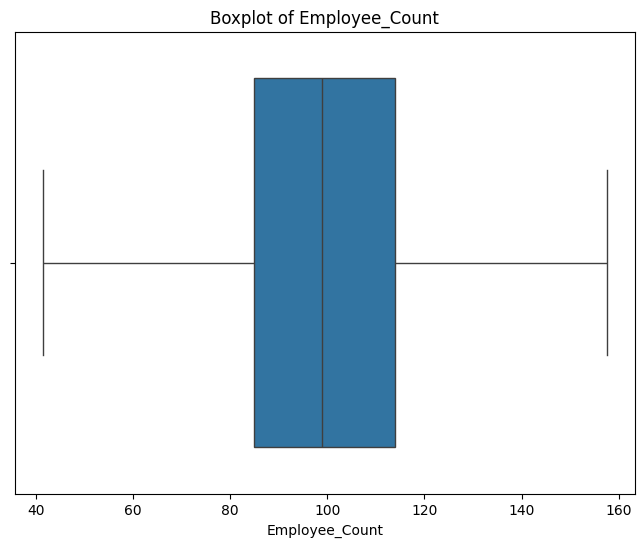

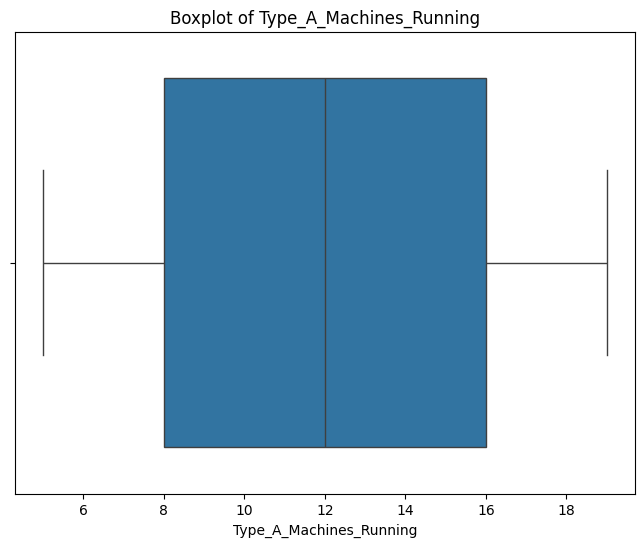

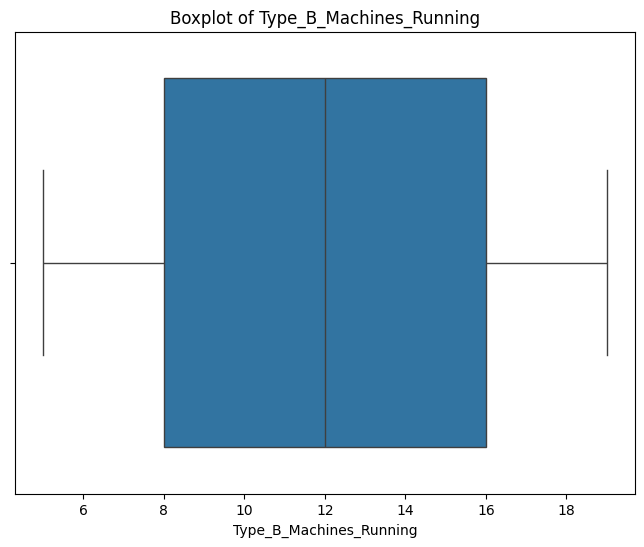

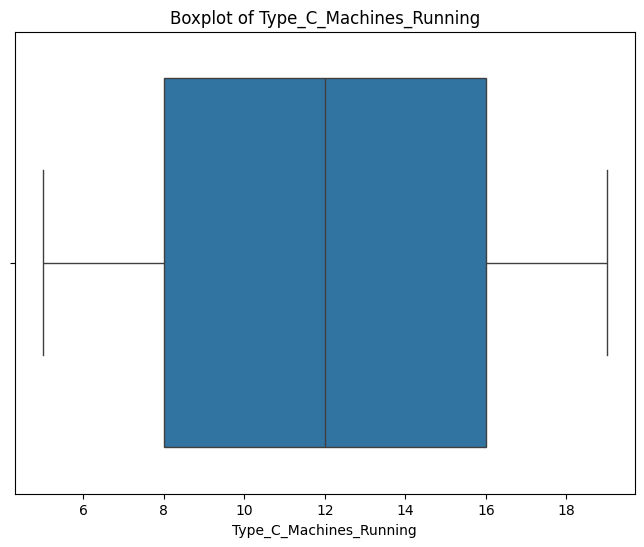

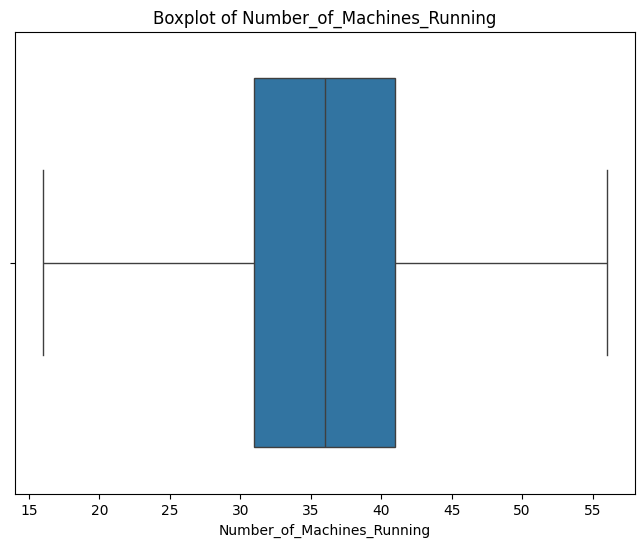

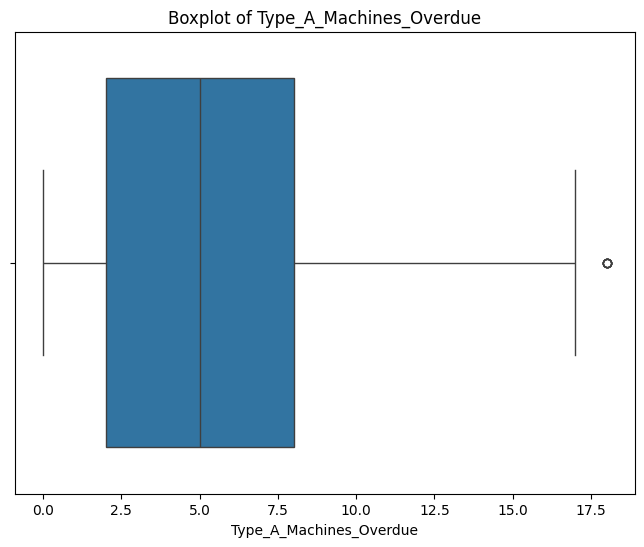

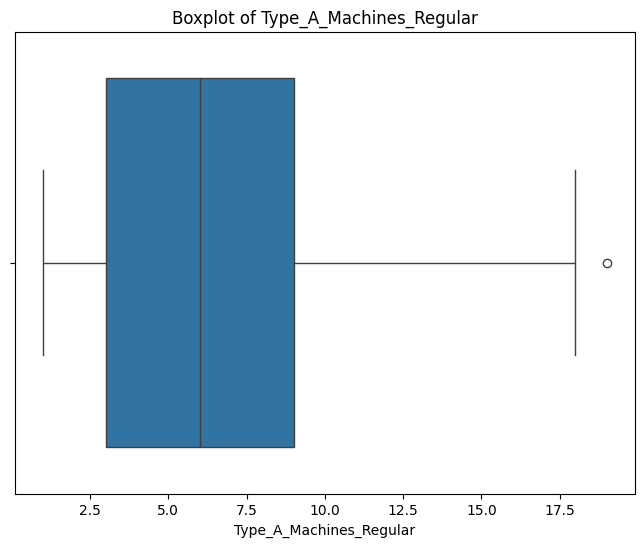

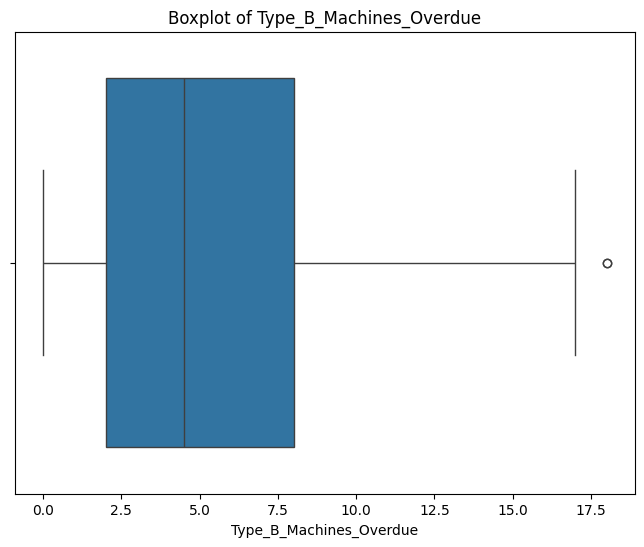

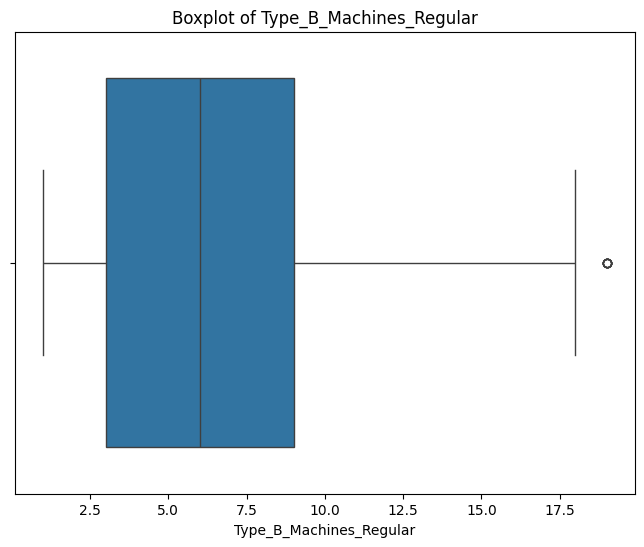

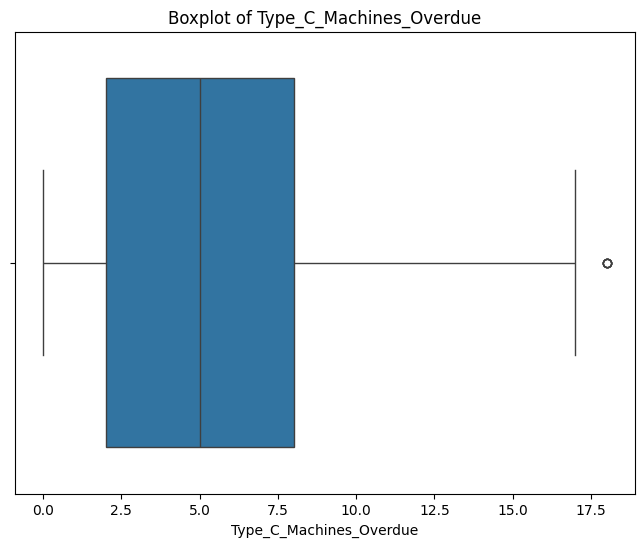

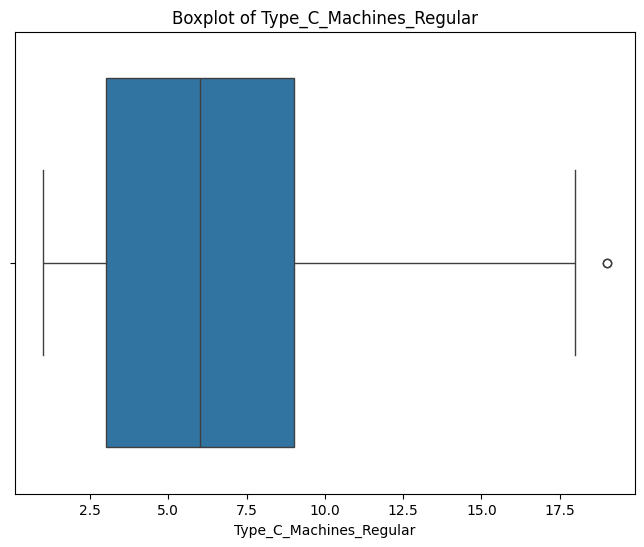

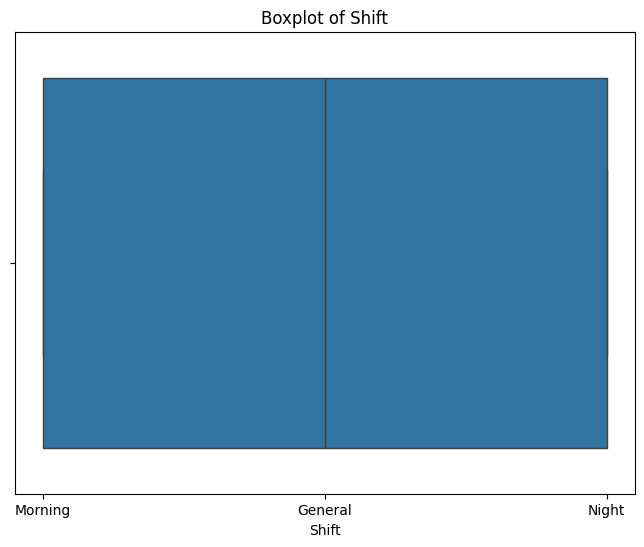

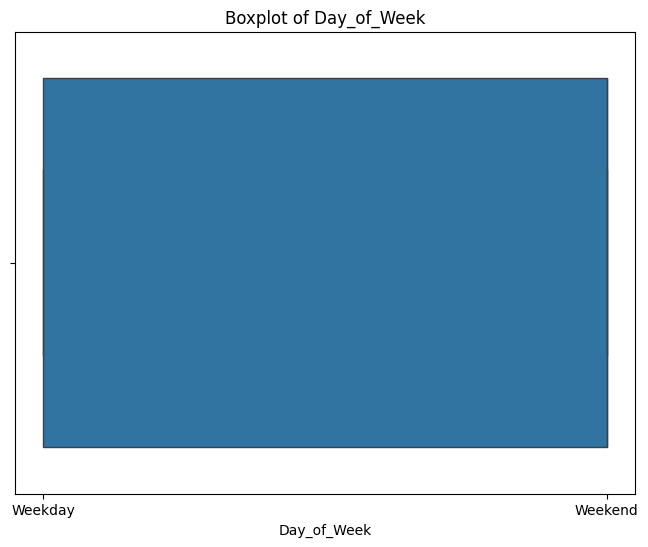

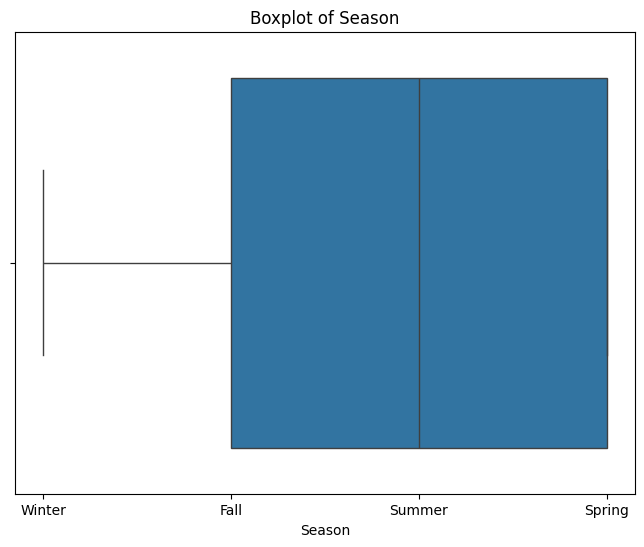

In [197]:
columns = ['Ambient_Temperature', 'Humidity', 'Production_Volume',
           'Employee_Count', 'Type_A_Machines_Running', 'Type_B_Machines_Running',
           'Type_C_Machines_Running', 'Number_of_Machines_Running',
           'Type_A_Machines_Overdue', 'Type_A_Machines_Regular',
           'Type_B_Machines_Overdue', 'Type_B_Machines_Regular',
           'Type_C_Machines_Overdue', 'Type_C_Machines_Regular', 'Shift',
           'Day_of_Week', 'Season']
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#  Converting the categorical columns into numerical columns by label encoding

By applying this r2_score is increasing

In [81]:
#shift_mapping = {'General': 0, 'Morning': 1, 'Night': 2}
#day_of_week_mapping = {'Weekday': 0, 'Weekend': 1}
#season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}
#df['Shift'] = df['Shift'].map(shift_mapping)
#df['Day_of_Week'] = df['Day_of_Week'].map(day_of_week_mapping)
#df['Season'] = df['Season'].map(season_mapping)


# One_Hot_Encoding using pandas

In [198]:
df = pd.get_dummies(df,columns=['Day_of_Week','Shift','Season'],drop_first=True)
#drop_first is making no impact

In [199]:
df.shape

(1000, 21)

In [170]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers = [
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['Day_of_Week','Shift','Season'])
],remainder='passthrough')

In [171]:
X_train_transformed = transformer.fit_transform(X_train)

In [173]:
X_test_transformed = transformer.fit_transform(X_test)

In [14]:
# df = pd.get_dummies(df, columns=['Shift','Day_of_Week','Season'])

# Checking the correlation with the output column 'Energy_Consumption'

In [200]:
df.corr()['Energy_Consumption']

Ambient_Temperature           0.110124
Humidity                      0.826869
Production_Volume             0.196971
Employee_Count                0.040443
Type_A_Machines_Running       0.111199
Type_B_Machines_Running       0.065788
Type_C_Machines_Running       0.127580
Number_of_Machines_Running    0.179361
Type_A_Machines_Overdue       0.027579
Type_A_Machines_Regular       0.084120
Type_B_Machines_Overdue       0.025070
Type_B_Machines_Regular       0.041128
Type_C_Machines_Overdue       0.091565
Type_C_Machines_Regular       0.036687
Energy_Consumption            1.000000
Day_of_Week_Weekend          -0.013595
Shift_Morning                 0.005297
Shift_Night                   0.023313
Season_Spring                -0.012812
Season_Summer                 0.047484
Season_Winter                -0.011248
Name: Energy_Consumption, dtype: float64

# Applying Feature construction

Creating a new feature 'Total_Machines_Running' 

In [16]:
# df['Total_Machines_Running'] = (df['Type_A_Machines_Running'] + df['Type_B_Machines_Running'] + df['Type_C_Machines_Running'])

In [17]:
#df.drop(['Type_A_Machines_Running', 'Type_B_Machines_Running', 'Type_C_Machines_Running'], axis=1, inplace=True)

In [175]:
df.head()

,Ambient_Temperature,Humidity,Production_Volume,Employee_Count,Type_A_Machines_Running,Type_B_Machines_Running,Type_C_Machines_Running,Number_of_Machines_Running,Type_A_Machines_Overdue,Type_A_Machines_Regular,Type_B_Machines_Overdue,Type_B_Machines_Regular,Type_C_Machines_Overdue,Type_C_Machines_Regular,Shift,Day_of_Week,Season,Energy_Consumption
0,27.0,0.0,469.0,85.0,10,16,11,37,7,3,9,7,7,4,Morning,Weekday,Winter,899.0
1,24.0,0.0,425.0,74.0,7,17,16,40,6,1,8,9,4,12,Morning,Weekday,Fall,829.0
2,28.0,1.0,532.0,91.0,12,6,13,31,11,1,2,4,8,5,General,Weekday,Summer,1281.0
3,33.0,1.0,634.0,104.0,11,9,5,25,9,2,8,1,1,4,Morning,Weekend,Spring,1484.0
4,24.0,0.0,312.0,112.0,7,12,7,26,4,3,3,9,4,3,Night,Weekday,Fall,615.0


In [201]:
df.columns

Index(['Ambient_Temperature', 'Humidity', 'Production_Volume',
       'Employee_Count', 'Type_A_Machines_Running', 'Type_B_Machines_Running',
       'Type_C_Machines_Running', 'Number_of_Machines_Running',
       'Type_A_Machines_Overdue', 'Type_A_Machines_Regular',
       'Type_B_Machines_Overdue', 'Type_B_Machines_Regular',
       'Type_C_Machines_Overdue', 'Type_C_Machines_Regular',
       'Energy_Consumption', 'Day_of_Week_Weekend', 'Shift_Morning',
       'Shift_Night', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [202]:
df.shape

(1000, 21)

AS i apply feature construction,the r2_score is decreasing

# Dropping the target column 'Energy_Consumption' to create feature set

In [203]:
X = df.drop(columns=['Energy_Consumption'])

# Assigning the target variable 'Energy_Consumption' to y

In [204]:
y = df['Energy_Consumption']

# Ploting the distribution of each column with a KDE curve

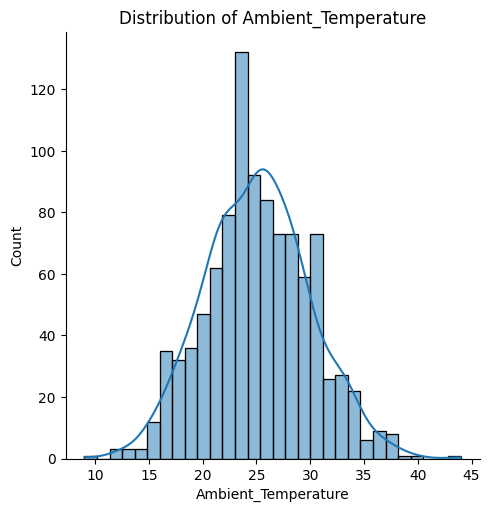

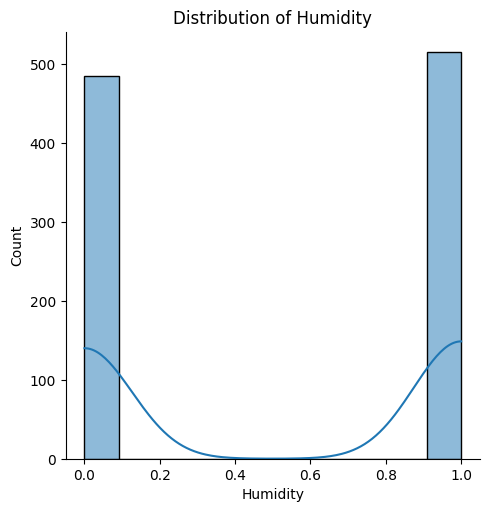

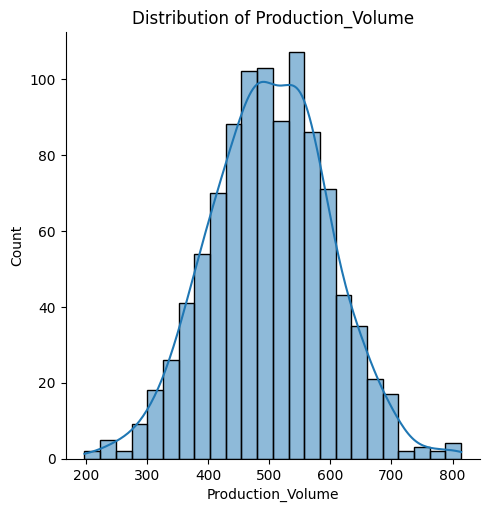

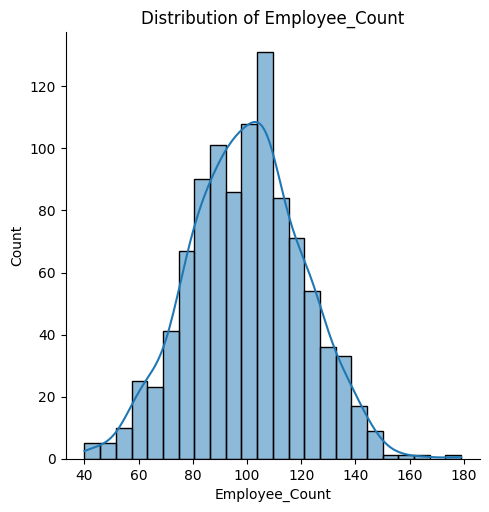

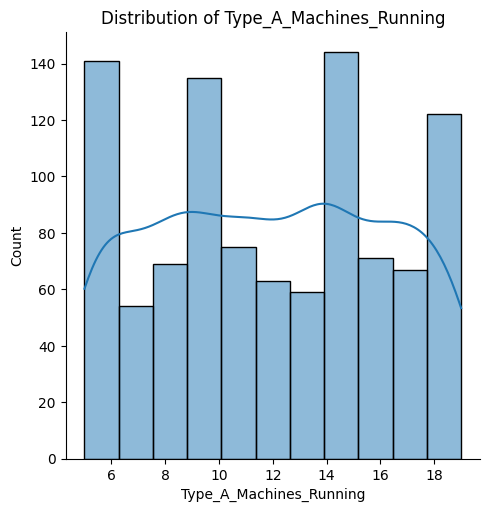

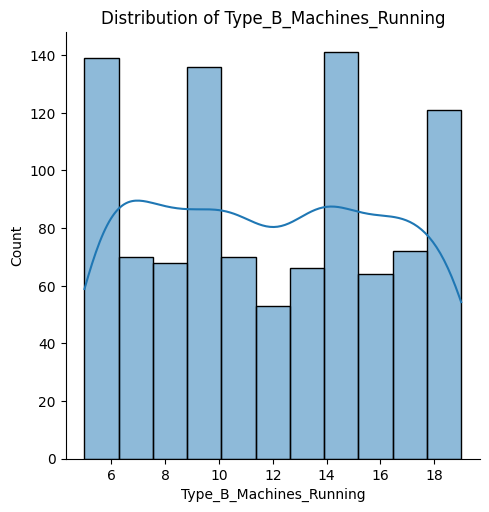

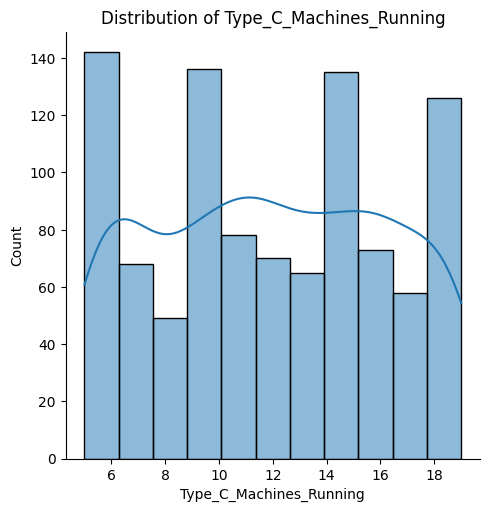

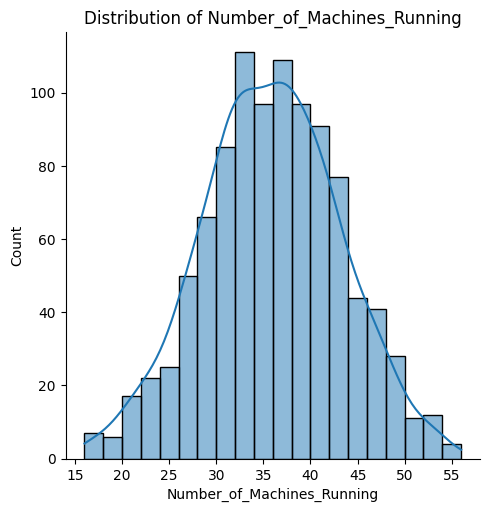

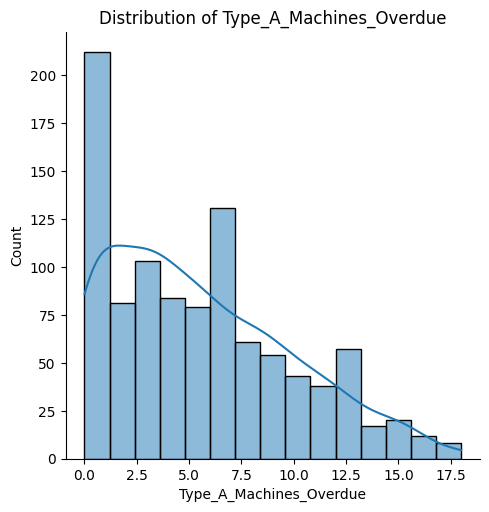

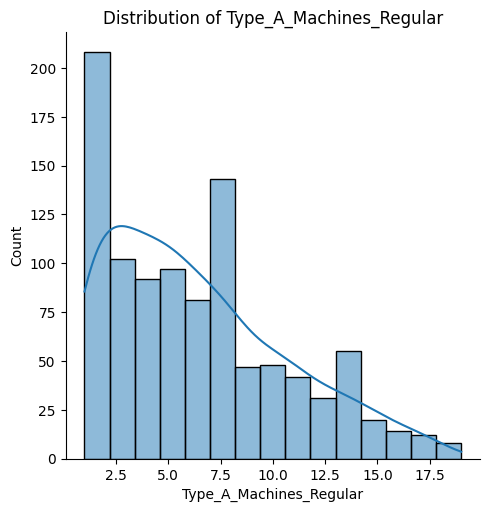

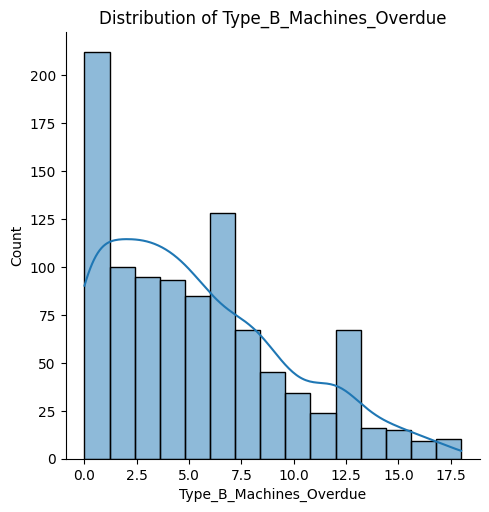

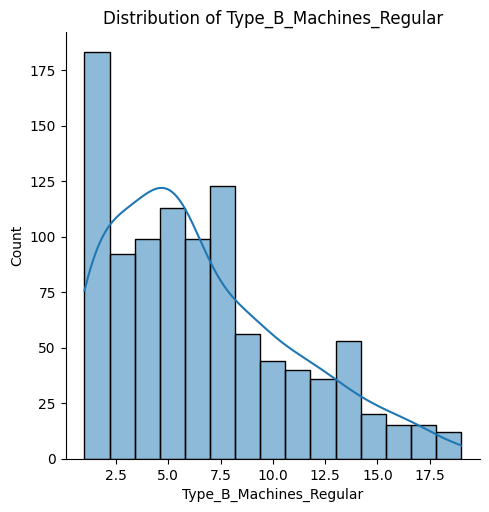

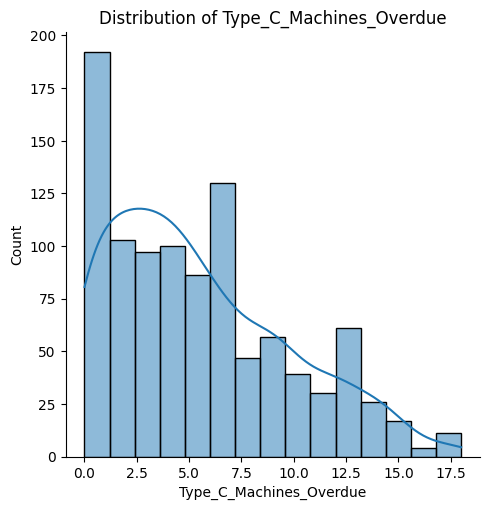

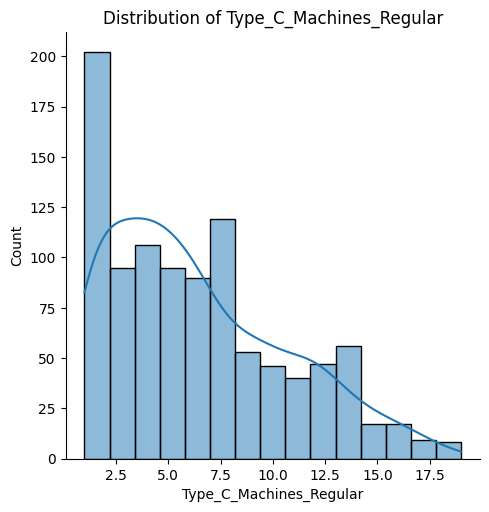

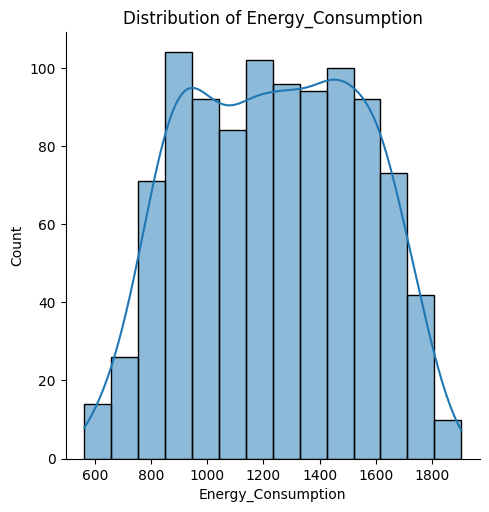

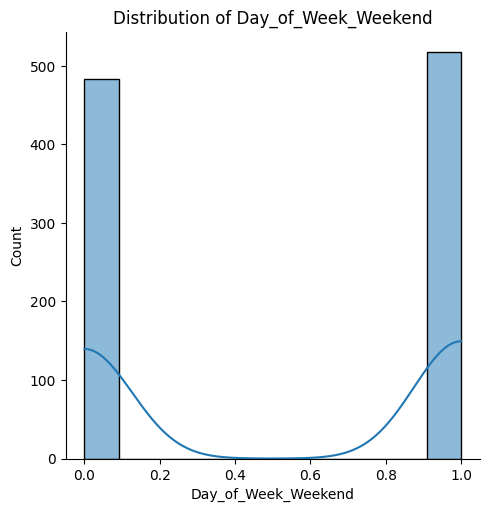

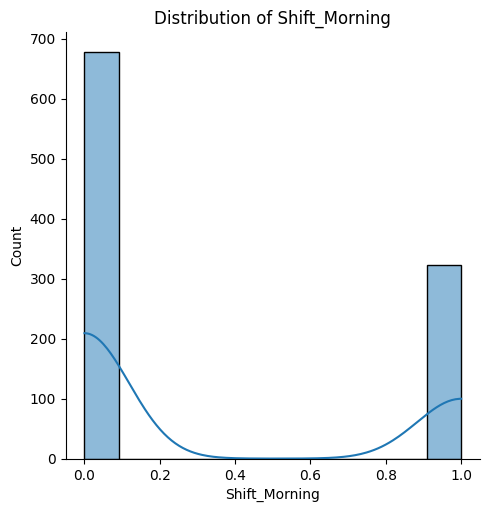

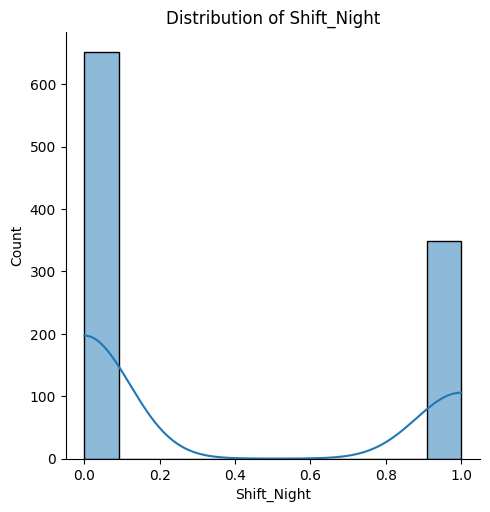

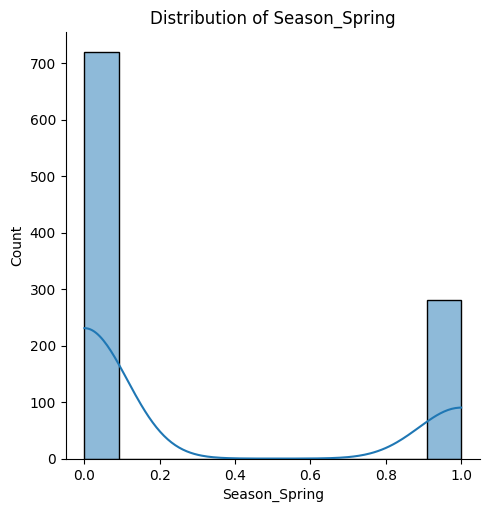

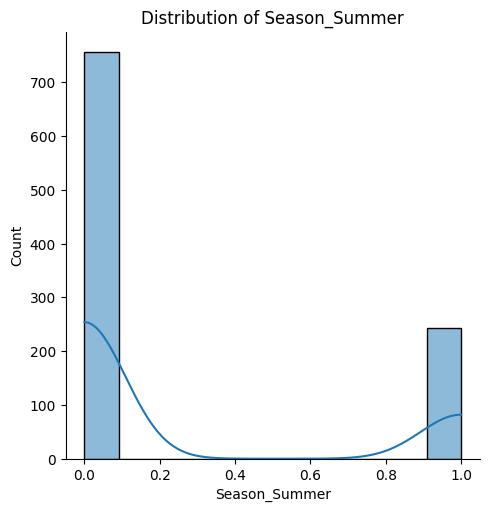

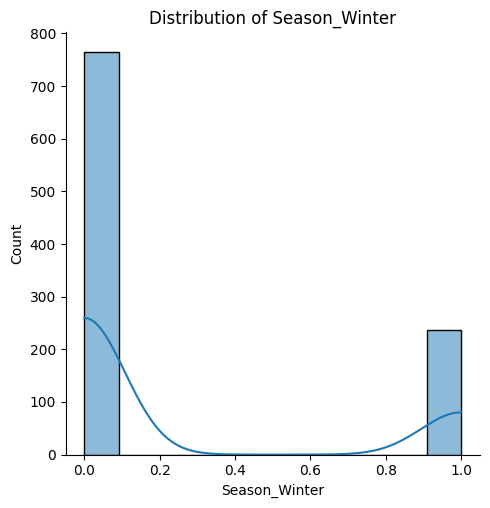

In [205]:
for column in df.columns:
    sns.displot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Spliting the dataset into training and testing sets

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
# Initializing the StandardScaler to standardize features 

In [208]:
scalar = StandardScaler()

# Performing PCA to plot it's distribution with KDE

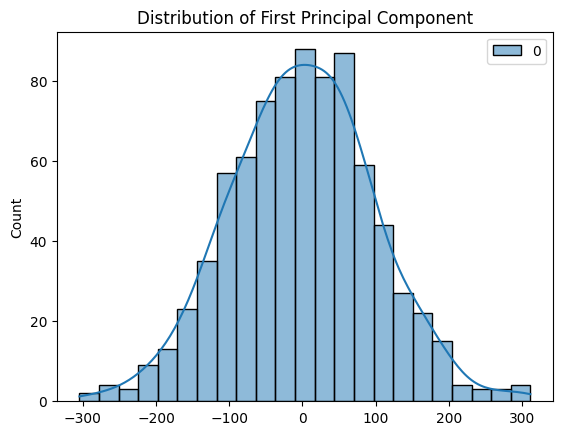

In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(X_train)
sns.histplot(principal_components, kde=True)
plt.title('Distribution of First Principal Component')
plt.show()

# Scaling the training and testing data using StandardScaler

In [213]:
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [214]:
X_train_scaled

array([[-0.22786433, -1.01511421, -0.93074311, ...,  1.5366667 ,
        -0.55617351, -0.54653573],
       [-0.02373055,  0.98511083,  0.77192123, ..., -0.65075921,
        -0.55617351,  1.82970656],
       [-0.4319981 , -1.01511421,  1.73030714, ..., -0.65075921,
        -0.55617351,  1.82970656],
       ...,
       [ 0.18040322, -1.01511421, -0.40057218, ...,  1.5366667 ,
        -0.55617351, -0.54653573],
       [-0.02373055,  0.98511083, -0.68604883, ..., -0.65075921,
        -0.55617351,  1.82970656],
       [-0.4319981 ,  0.98511083, -0.50252812, ..., -0.65075921,
         1.79800006, -0.54653573]])

In [215]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [216]:
X_train_scaled

,Ambient_Temperature,Humidity,Production_Volume,Employee_Count,Type_A_Machines_Running,Type_B_Machines_Running,Type_C_Machines_Running,Number_of_Machines_Running,Type_A_Machines_Overdue,Type_A_Machines_Regular,Type_B_Machines_Overdue,Type_B_Machines_Regular,Type_C_Machines_Overdue,Type_C_Machines_Regular,Day_of_Week_Weekend,Shift_Morning,Shift_Night,Season_Spring,Season_Summer,Season_Winter
0,-0.227864,-1.015114,-0.930743,0.768057,0.969867,0.737372,-1.647886,0.039392,0.118799,0.864109,0.148764,0.589076,-1.307289,-0.329175,0.990050,1.408927,-0.715743,1.536667,-0.556174,-0.546536
1,-0.023731,0.985111,0.771921,-0.874071,1.440106,0.737372,0.946746,1.844152,0.583540,0.864109,0.148764,0.589076,0.329745,0.613851,0.990050,1.408927,-0.715743,-0.650759,-0.556174,1.829707
2,-0.431998,-1.015114,1.730307,-2.516199,-0.911087,-1.372755,0.474994,-1.071229,-0.345942,-0.570593,-1.276517,-0.112553,1.499055,-1.036444,-1.010051,-0.709760,-0.715743,-0.650759,-0.556174,1.829707
3,-0.431998,0.985111,-0.563702,1.202738,-1.381326,1.675206,1.182621,0.872358,-0.578312,-0.809710,-1.276517,2.927840,-0.137979,1.321120,-1.010051,-0.709760,-0.715743,-0.650759,1.798000,-0.546536
4,1.609340,0.985111,0.058230,-1.936624,1.675225,-1.372755,1.654372,1.150014,1.745393,-0.092359,-0.801423,-0.580306,1.499055,0.142338,0.990050,-0.709760,1.397151,1.536667,-0.556174,-0.546536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.813473,-1.015114,-0.471941,0.719759,1.204986,-1.372755,-1.176134,-0.793574,2.442504,-1.287944,-0.801423,-0.580306,-0.839565,-0.329175,-1.010051,1.408927,-0.715743,1.536667,-0.556174,-0.546536
796,1.405206,0.985111,-0.512724,-0.535986,0.029390,-1.138296,-1.412010,-1.487712,-0.113571,0.146758,-0.326330,-0.814182,-0.371841,-1.036444,0.990050,1.408927,-0.715743,1.536667,-0.556174,-0.546536
797,0.180403,-1.015114,-0.400572,0.236780,1.675225,1.206289,-1.647886,0.733531,0.351170,1.342343,-0.326330,1.524582,-0.371841,-1.272200,-1.010051,-0.709760,1.397151,1.536667,-0.556174,-0.546536
798,-0.023731,0.985111,-0.686049,0.719759,-0.911087,-0.903838,1.418497,-0.238263,-0.113571,-0.809710,-0.801423,-0.112553,2.668365,-1.272200,0.990050,-0.709760,1.397151,-0.650759,-0.556174,1.829707


# Applying Linear Regression Model

 Initializing the Linear Regression model

In [222]:
model = LinearRegression()

 Train the Linear Regression model on the scaled training data

In [223]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [224]:
y_pred0= model.predict(X_test_scaled)

In [225]:
score0 = r2_score(y_test,y_pred0)

In [226]:
score0

0.7379211034580606

In [ ]:
# Calculate Mean Squared Error (MSE)

In [238]:
mse = mean_squared_error(y_test, y_pred0)

In [241]:
mse

24898.835960566983

In [239]:
rmse = np.sqrt(mse)

In [240]:
rmse

157.79364993740077

In [ ]:
#if the r2_score for X_train is more than X_test than we need to apply regularization

In [230]:
r2_train = r2_score(y_train, model.predict(X_train_scaled))
r2_test = r2_score(y_test, model.predict(X_test_scaled))

In [231]:
r2_train

0.7564367799679326

In [232]:
r2_test

0.7379211034580606

# Applying Ridge regression(L2)

In [102]:
R = Ridge()

In [103]:
parameter = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(R,parameter,scoring='r2',cv=5)


In [104]:
R.fit(X_train_scaled,y_train)

Ridge()

In [205]:
print(ridgecv.best_params_)

{'alpha': 5}


In [206]:
print(ridgecv.best_score_)

0.7433804204976264


In [105]:
y_pred1 = R.predict(X_test_scaled)

In [106]:
score1 = r2_score(y_test,y_pred1)

In [107]:
score1

0.7386373910703621

In [ ]:
# Calculate Mean Squared Error (MSE)

In [242]:
mse = mean_squared_error(y_test, y_pred1)

In [243]:
mse

24830.78497288883

In [244]:
rmse = np.sqrt(mse)

In [245]:
rmse

157.5778695530842

In [233]:
r2_train = r2_score(y_train, R.predict(X_train_scaled))
r2_test = r2_score(y_test, R.predict(X_test_scaled))

In [234]:
r2_train

0.7570044870876595

In [235]:
r2_test

0.7386373910703621

# Applying Lasso Regression(L1)

In [108]:
L = Lasso()

In [211]:
parameter = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(R,parameter,scoring='r2',cv=5)


In [109]:
L.fit(X_train_scaled,y_train)

Lasso()

In [213]:
lassocv.best_params_

{'alpha': 5}

In [214]:
print(lassocv.best_score_)

0.7433804204976264


In [110]:
y_pred2 = L.predict(X_test_scaled)

In [111]:
score2 = r2_score(y_test,y_pred2)

In [112]:
score2

0.7397334662225649

In [218]:
# Calculate Mean Squared Error (MSE)

152.57796422949696


In [246]:
mse = mean_squared_error(y_test, y_pred1)

In [247]:
mse

24830.78497288883

In [248]:
rmse = np.sqrt(mse)

In [249]:
rmse

157.5778695530842

# Applying elastic net

In [53]:
En = ElasticNet()

In [220]:
parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100],  
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1],  
    'max_iter': [1000, 5000, 10000],  
    'tol': [1e-4, 1e-3, 1e-2],  
}

In [221]:
ElasticCV=GridSearchCV(En,parameters,scoring='r2',cv=5)

In [54]:
En.fit(X_train_scaled,y_train)

ElasticNet()

In [223]:
print(ElasticCV.best_params_)

{'alpha': 1, 'l1_ratio': 1, 'max_iter': 1000, 'tol': 0.01}


In [224]:
print(ElasticCV.best_score_)

0.7436020302054386


In [55]:
y_pred3 = En.predict(X_test_scaled)

In [56]:
score3 = r2_score(y_test,y_pred3)

In [57]:
score3

0.6617928633957388

In [ ]:
# Calculate Mean Squared Error (MSE)

In [251]:
mse = mean_squared_error(y_test, y_pred1)

In [252]:
mse

24830.78497288883

In [253]:
rmse = np.sqrt(mse)

In [254]:
rmse

157.5778695530842

# Applying gradio Library

In [59]:
def predict_energy_consumption(ambient_temp, humidity, prod_volume, emp_count,
                               a_machines_running, b_machines_running, c_machines_running,
                               num_machines_running, a_machines_overdue, a_machines_regular,
                               b_machines_overdue, b_machines_regular, c_machines_overdue, 
                               c_machines_regular, shift, day_of_week, season):
    input_data = [[ambient_temp, humidity, prod_volume, emp_count,
                   a_machines_running, b_machines_running, c_machines_running,
                   num_machines_running, a_machines_overdue, a_machines_regular,
                   b_machines_overdue, b_machines_regular, c_machines_overdue, 
                   c_machines_regular, shift, day_of_week, season]]
    
    prediction = En.predict(input_data)
    
    return f"Predicted Energy Consumption: {prediction[0]:.2f}"
inputs = [
    gr.Number(label="Ambient Temperature (°C)"),
    gr.Number(label="Humidity (%)"),
    gr.Number(label="Production Volume"),
    gr.Number(label="Employee Count"),
    gr.Number(label="Type A Machines Running"),
    gr.Number(label="Type B Machines Running"),
    gr.Number(label="Type C Machines Running"),
    gr.Number(label="Number of Machines Running"),
    gr.Number(label="Type A Machines Overdue"),
    gr.Number(label="Type A Machines Regular"),
    gr.Number(label="Type B Machines Overdue"),
    gr.Number(label="Type B Machines Regular"),
    gr.Number(label="Type C Machines Overdue"),
    gr.Number(label="Type C Machines Regular"),
    gr.Number(label="Shift"),
    gr.Number(label="Day of the Week"),
    gr.Number(label="Season")
]

output = gr.Textbox(label="Predicted Energy Consumption")

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_energy_consumption,
    inputs=inputs,
    outputs=output,
    title="Energy Consumption Predictor",
    description="Predict the energy consumption based on various production and operational metrics."
)
interface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


C:\ProgramData\anaconda3\Lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.42.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


In [37]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [3]:
#model = DecisionTreeRegressor(random_state=42)

In [4]:
#model.fit(X_train,y_train)

In [5]:
#y_pred = model.predict(X_test)

In [6]:
#X_train.shape

In [7]:
#X_test.shape

In [8]:
#mse2 = mean_squared_error(y_test,y_pred)

In [9]:
#mse2

In [10]:
#r22 = r2_score(y_test,y_pred)

In [11]:
#r22

In [12]:
#rf_model = RandomForestRegressor(n_estimators=100,random_state=42)

In [13]:
#rf_model.fit(X_train,y_train)

In [14]:
#y_pred = rf_model.predict(X_test)

In [15]:
#mse = mean_squared_error(y_test,y_pred)

In [16]:
#r2 = r2_score(y_test,y_pred)

In [17]:
#mse

In [18]:
#r2